<a href="https://colab.research.google.com/github/sourit123/Sourit-Khamaru/blob/main/Student_Result_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Expanded_data_with_more_features.csv')

In [3]:
print(df.head(6))

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   
5           5  female     group B  associate's degree      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes         

In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info() #helps me to understand the datatype of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.isnull().sum() #helps me to understand the missing values

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


In [7]:
#drop unnamed column

df = df.drop('Unnamed: 0', axis = 1)
print(df.head(6))

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   
5  female     group B  associate's degree      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   
5             married     regularly          yes 

In [8]:
#change weekly study hours column
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace("05-Oct","5-10")
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


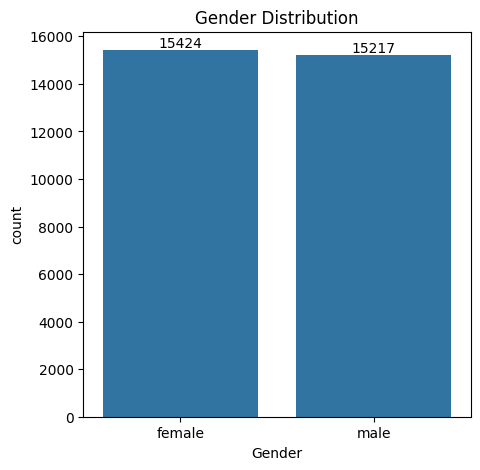

In [22]:
#gender distribution
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Gender",data=df)
ax.bar_label(ax.containers[0]) # counts the total number for each histogram and puts a label into it
plt.title("Gender Distribution")
plt.show() # number of female > no of male

In [12]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean', "ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


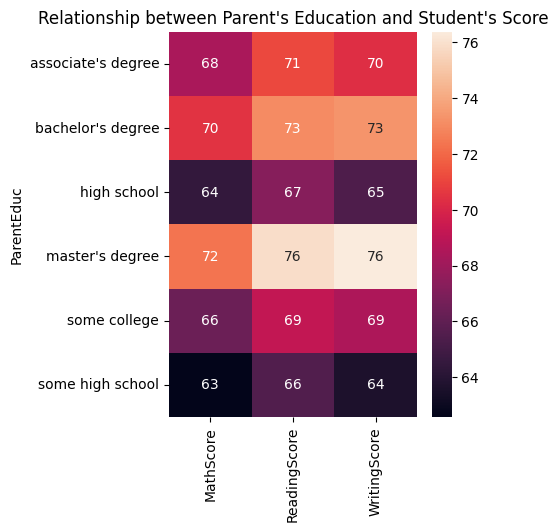

In [23]:
plt.figure(figsize=(4,5))
sns.heatmap(gb, annot = True) # annot = True puts the mumber label (average) for each box
plt.title("Relationship between Parent's Education and Student's Score")
plt.show() #education of parents have a major impact on students

In [20]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean', "ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


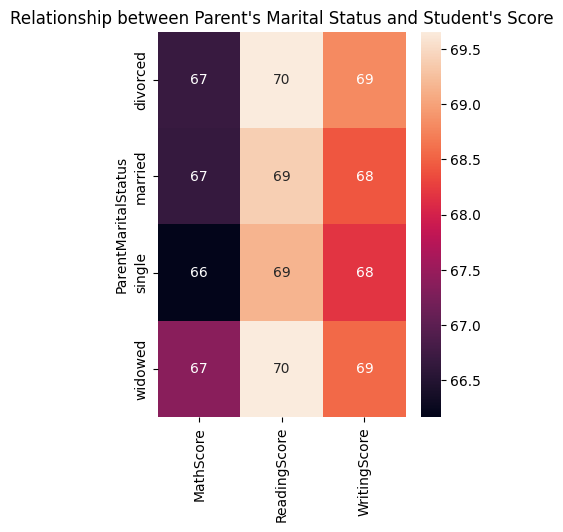

In [24]:
plt.figure(figsize=(4,5))
sns.heatmap(gb1, annot = True) # annot = True puts the mumber label (average) for each box
plt.title("Relationship between Parent's Marital Status and Student's Score")
plt.show() #marital status has very less/negligible impact on student score

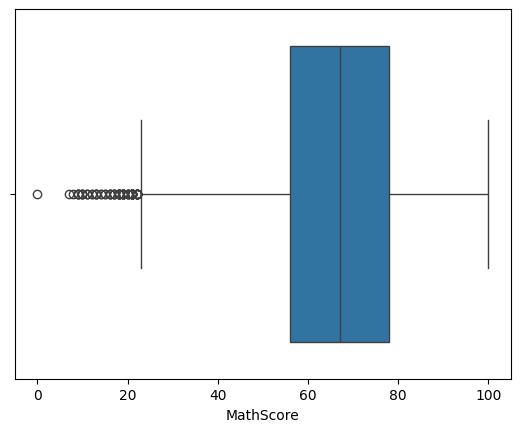

In [27]:
sns.boxplot(data=df, x="MathScore")
plt.show() #boxplot tells if there is outlier or not (Balck circles are outliers)

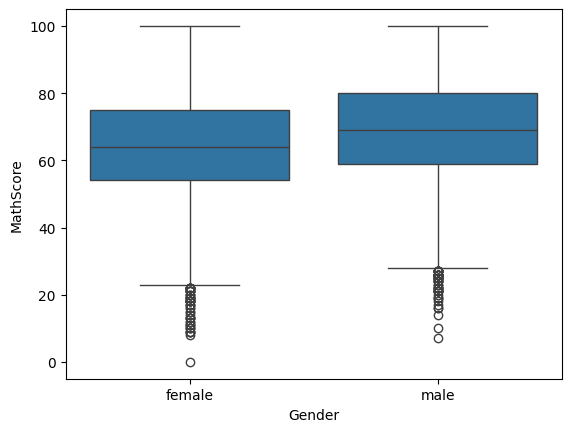

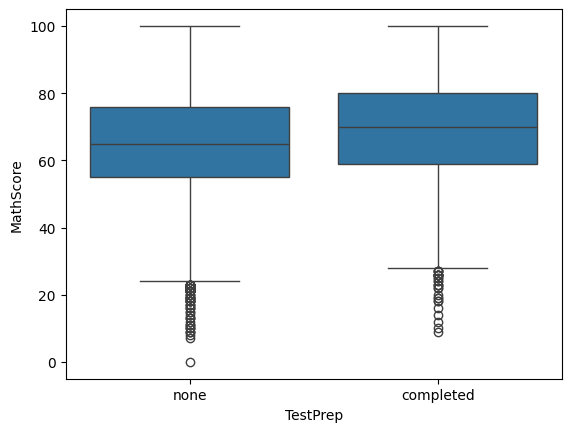

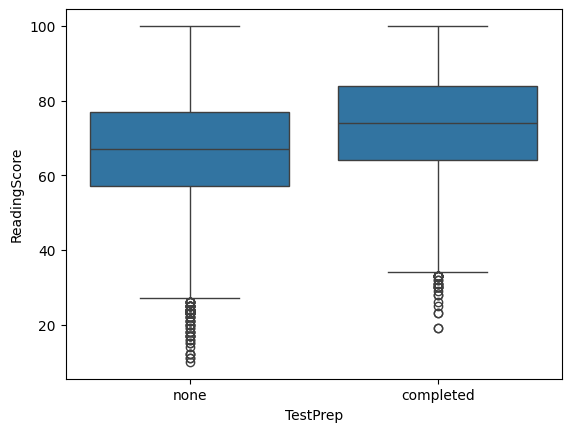

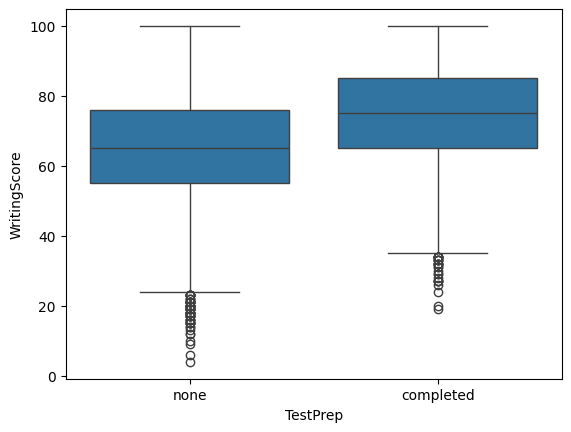

In [26]:
sns.boxplot(data= df , x = "Gender", y = "MathScore")
plt.show()

sns.boxplot(data= df , x = "TestPrep", y = "MathScore")
plt.show()

sns.boxplot(data= df , x = "TestPrep", y = "ReadingScore")
plt.show()

sns.boxplot(data= df , x = "TestPrep", y = "WritingScore")
plt.show()

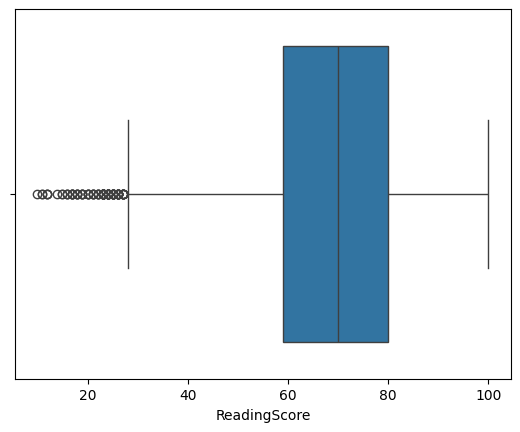

In [28]:
sns.boxplot(data=df, x="ReadingScore")
plt.show() #boxplot tells if there is outlier or not (Balck circles are outliers)

In [30]:
print(df.columns) # Print the columns of the DataFrame to check if "EthnicGroup" exists
print(df["EthnicGroup"].unique()) # Run this once you have confirmed "EthnicGroup" is a valid column

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')
[nan 'group C' 'group B' 'group A' 'group D' 'group E']


In [32]:
# distribution of ethnic groups
groupA = df.loc[(df['EthnicGroup']== "group A")].count
print(groupA)

<bound method DataFrame.count of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
3        male     group A  associate's degree  free/reduced       none   
13       male     group A        some college      standard  completed   
14     female     group A     master's degree      standard       none   
25       male     group A     master's degree  free/reduced       none   
56       male     group A    some high school  free/reduced       none   
...       ...         ...                 ...           ...        ...   
30603    male     group A         high school      standard       none   
30621  female     group A   bachelor's degree      standard       none   
30622    male     group A  associate's degree  free/reduced  completed   
30627  female     group A         high school      standard  completed   
30634    male     group A  associate's degree  free/reduced  completed   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
3         

In [34]:
# distribution of ethnic groups
groupA = df.loc[(df['EthnicGroup']== "group A")].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


[2219, 5826, 9212, 7503, 4041]


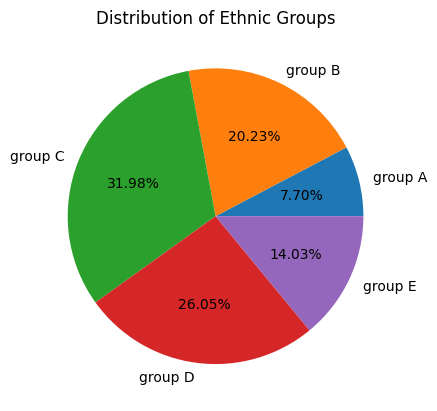

In [43]:
# distribution of ethnic groups
groupA = df.loc[(df['EthnicGroup']== "group A")].count()
groupB = df.loc[(df['EthnicGroup']== "group B")].count()
groupC = df.loc[(df['EthnicGroup']== "group C")].count()
groupD = df.loc[(df['EthnicGroup']== "group D")].count()
groupE = df.loc[(df['EthnicGroup']== "group E")].count()

l= ["group A","group B", "group C", "group D", "group E"]
# Extract the count of each group from the Series
mlist= [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]
print(mlist)
plt.pie(mlist, labels=l, autopct= "%1.2f%%") # Use labels parameter for the group names
plt.title("Distribution of Ethnic Groups")
plt.show()

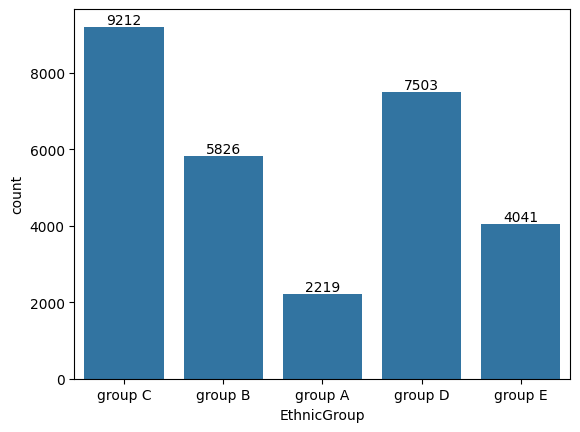

In [44]:
bx = sns.countplot(data=df , x = 'EthnicGroup')
bx.bar_label(bx.containers[0])
plt.show()